In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn

In [2]:
# Source : https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+
df = pd.read_csv('occupancy_data/datatraining.txt')
df = df[[c for c in df.columns if c not in ['date']]]
print(df.shape, df.columns)
print(df.head())

(8143, 6) Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')
   Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
1        23.18   27.2720  426.0  721.25       0.004793          1
2        23.15   27.2675  429.5  714.00       0.004783          1
3        23.15   27.2450  426.0  713.50       0.004779          1
4        23.15   27.2000  426.0  708.25       0.004772          1
5        23.10   27.2000  426.0  704.50       0.004757          1


In [3]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


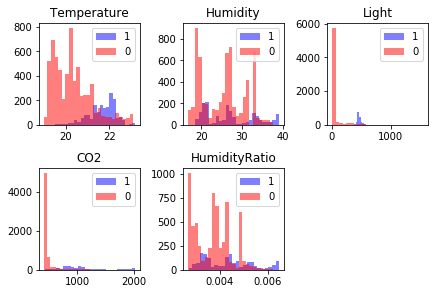

In [4]:
def sephist(col):
    yes = df[df['Occupancy'] == 1][col]
    no = df[df['Occupancy'] == 0][col]
    return yes, no

for num, alpha in enumerate(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']):
    plt.subplot(2, 3, num+1)
    plt.hist(sephist(alpha)[0], bins=25, alpha=0.5, label="1", color='b')
    plt.hist(sephist(alpha)[1], bins=25, alpha=0.5, label="0", color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

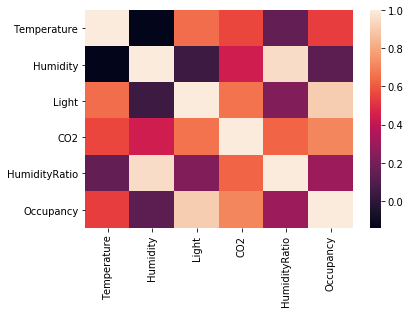

In [5]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df[[c for c in df.columns if c not in ['date']]].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [7]:
X = df[[c for c in df.columns if c != 'Occupancy']]
X.drop(columns=['Light'], inplace=True)
y = df['Occupancy']

/home/renaud/.local/share/virtualenvs/datascience-f90qDZbT/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


from sklearn import svm
clf = svm.SVC(kernel='linear', C=2)
scores = cross_val_score(clf, X, y, cv=3)

print(np.mean(scores))

In [20]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#X = X.head(2000)
#y = y.head(2000)
param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'sigmoid']},

grid = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=2, n_jobs=4)
grid.fit(X, y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=({'C': [1, 10, 100, 1000], 'kernel': ['linear', 'sigmoid']},),
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.84
{'C': 1, 'kernel': 'sigmoid'}
